In [1]:
%cd ../
%matplotlib inline

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.htfa as HTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
mini_pieman = niidb.FMriActivationsDb('data/mini_pieman.db',
                                      mask='data/pieman_data/wholebrain.nii.gz')

In [5]:
htfa = HTFA.HierarchicalTopographicFactorAnalysis(list(mini_pieman.all()), num_factors=100,
                                                  mask='data/pieman_data/wholebrain.nii.gz')

10/12/2018 16:54:48 Loading Nifti image data/pieman_data/sub-001-task-intact1.nii with mask data/pieman_data/wholebrain.nii.gz (zscore=False, smooth=None)
10/12/2018 16:54:49 Loading Nifti image data/pieman_data/sub-003-task-intact1.nii with mask data/pieman_data/wholebrain.nii.gz (zscore=False, smooth=None)
10/12/2018 16:54:51 Loading Nifti image data/pieman_data/sub-002-task-intact1.nii with mask data/pieman_data/wholebrain.nii.gz (zscore=False, smooth=None)


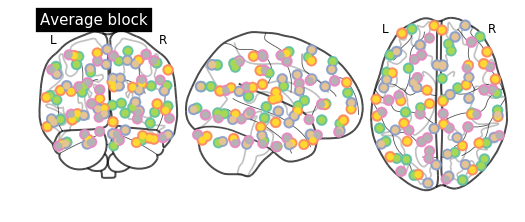

In [6]:
htfa.plot_factor_centers()

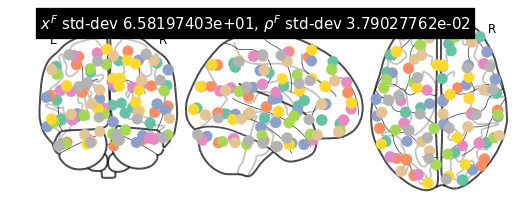

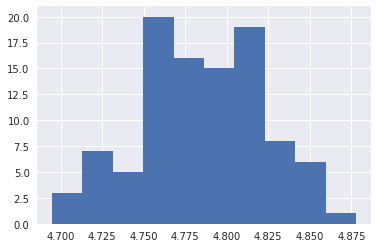

(<nilearn.plotting.displays.OrthoProjector at 0x7f61cd5af8d0>,
 tensor([[-55.0226, -55.5857,  45.2817],
         [  4.2745,  10.5613,   4.5752],
         [-34.2963, -24.7889,  -8.2418],
         [ 17.6476, -67.1340,  -3.7585],
         [ 50.9112, -57.0367,  49.1925],
         [-54.2125,  17.1714,  10.0824],
         [ 44.0629,  54.5832, -14.2510],
         [-50.3438,  35.3672, -10.4819],
         [ 25.7291, -96.1254,   2.0608],
         [ 61.6318,  -4.6563,  25.2950],
         [-18.5268, -19.8995,  39.1852],
         [ 13.7690,  39.7504,   6.6727],
         [ 10.9368,  47.0918,  51.2050],
         [  5.6702, -11.5430, -38.2411],
         [ 20.6193,   0.8510,  61.5083],
         [-43.5494, -73.3580, -34.3209],
         [ 62.5497, -22.8625,   3.5031],
         [-33.4037, -74.6078,  47.5056],
         [-27.5204,  62.6938,  18.3069],
         [ 45.2487, -81.2587,  24.9123],
         [-61.5374, -41.6830,  14.5134],
         [-25.2598, -91.1582,  24.7213],
         [ 35.5980, -25.6390, -32.0

In [7]:
htfa.visualize_factor_template()

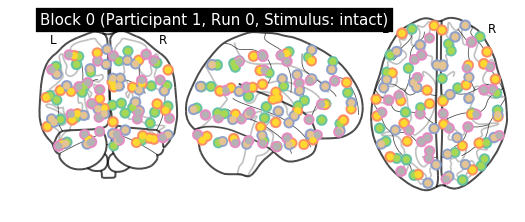

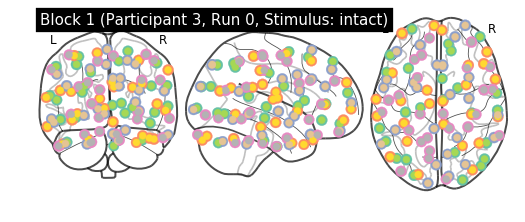

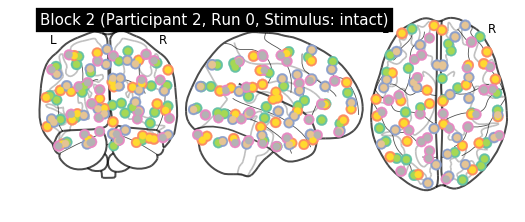

In [8]:
for b in range(htfa.num_blocks):
    htfa.plot_factor_centers(block=b)

In [9]:
losses = htfa.train(num_steps=500, learning_rate=1e-1, log_level=logging.INFO, num_particles=1,
                    batch_size=128, use_cuda=True, blocks_batch_size=8)

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/tfa_models.py:241: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  softplus(params['voxel_noise'])[0],
10/12/2018 16:56:46 [Epoch 1] (929ms) Posterior free-energy 1.66609648e+08
10/12/2018 16:56:47 [Epoch 2] (897ms) Posterior free-energy 1.44448064e+08
10/12/2018 16:56:48 [Epoch 3] (929ms) Posterior free-energy 1.36624480e+08
10/12/2018 16:56:49 [Epoch 4] (871ms) Posterior free-energy 1.29259104e+08
10/12/2018 16:56:50 [Epoch 5] (865ms) Posterior free-energy 1.27567808e+08
10/12/2018 16:56:51 [Epoch 6] (850ms) Posterior free-energy 1.24318032e+08
10/12/2018 16:56:52 [Epoch 7] (888ms) Posterior free-energy 1.23350424e+08
10/12/2018 16:56:53 [Epoch 8] (881ms) Posterior free-energy 1.23014632e+08
10/12/2018 16:56:53 [Epoch 9] (932ms) Posterior free-energy 1.22506464e+08
10/12/2018 16:56:54 [Epoch 10] (934ms) Posterior free-energy 1.21965376e+

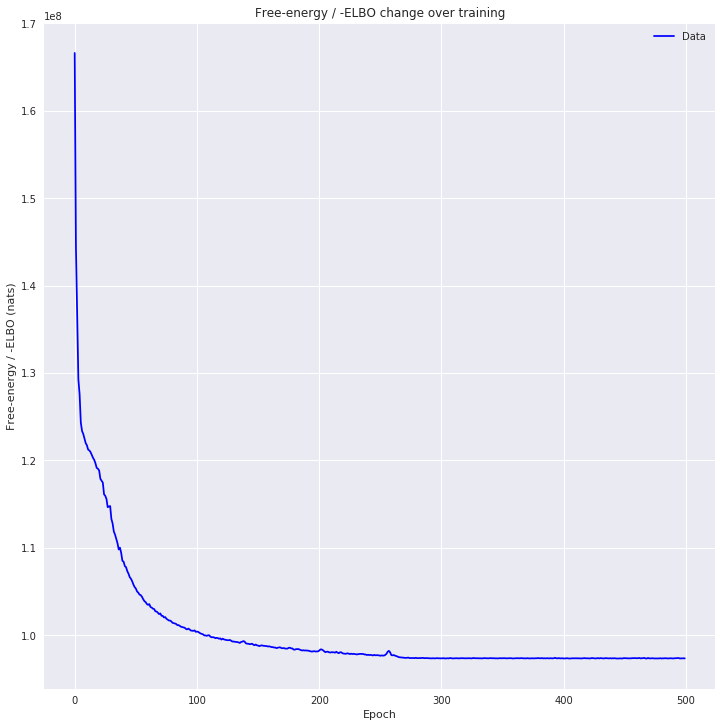

In [10]:
utils.plot_losses(losses)

In [11]:
htfa.normalize_activations()

[tensor(10.8725), tensor(9.7904), tensor(8.5388)]

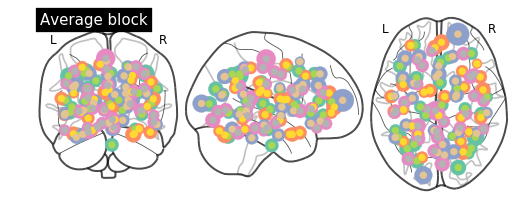

In [12]:
htfa.plot_factor_centers()

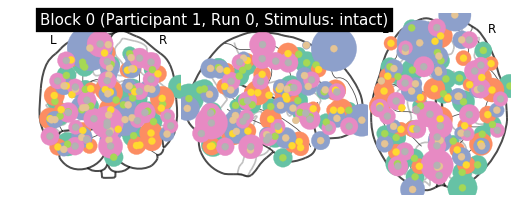

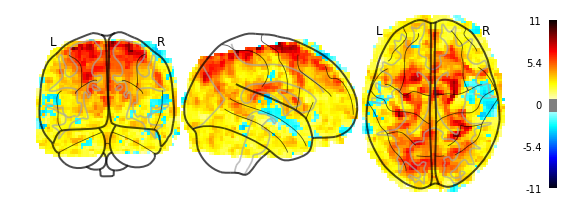

10/12/2018 17:04:40 Reconstruction Error (Frobenius Norm): 4.10753369e+03 out of 5.08479883e+03


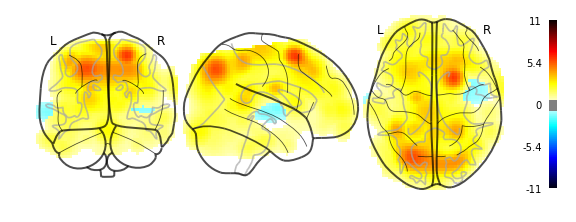

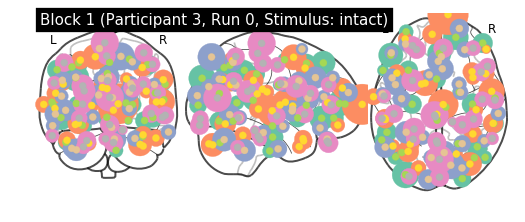

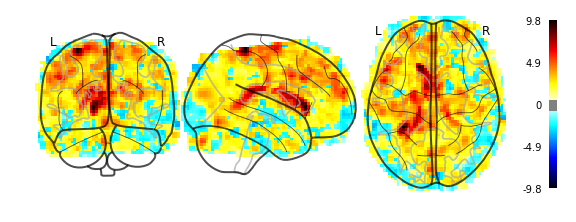

10/12/2018 17:05:10 Reconstruction Error (Frobenius Norm): 4.27693652e+03 out of 5.19534326e+03


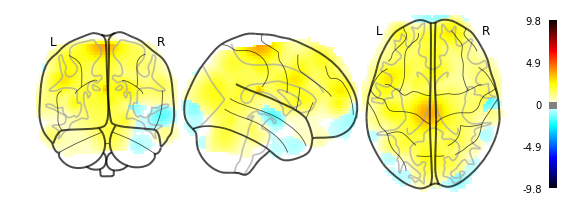

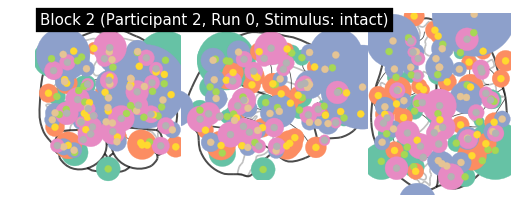

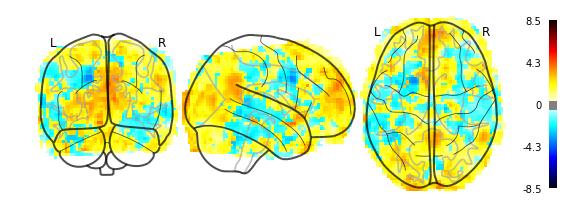

10/12/2018 17:05:40 Reconstruction Error (Frobenius Norm): 3.99957373e+03 out of 5.19534229e+03


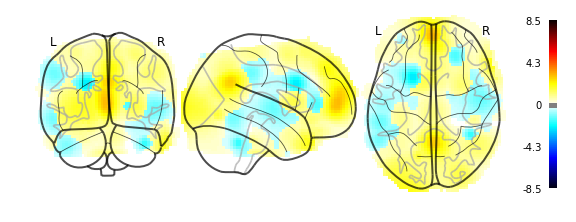

In [13]:
for b in range(htfa.num_blocks):
    htfa.plot_factor_centers(block=b)
    htfa.plot_original_brain(block=b)
    htfa.plot_reconstruction(block=b)

In [14]:
htfa.results(0)

{'factor_centers': tensor([[ -44.0870,  -51.4049,   35.8604],
         [   8.2066,   10.2139,   10.0478],
         [ -18.4736,  -18.2581,    3.6942],
         [  15.8476,  -55.2822,    4.9965],
         [  46.3928,  -47.9283,   41.9601],
         [ -42.3122,   12.6804,   -2.3719],
         [  47.5667,   40.1676,  -12.7051],
         [ -50.7281,   23.0582,   -6.9129],
         [  25.5827, -104.3813,   12.1619],
         [  75.4737,    2.7242,   23.9924],
         [ -26.2850,  -42.2099,   45.9777],
         [  -0.7738,   37.9334,   19.3306],
         [   3.0063,   29.4150,   47.4537],
         [   5.6855,   -5.4756,  -50.1218],
         [  22.4555,   11.1161,   58.7866],
         [ -42.7847,  -79.0005,  -36.4855],
         [  57.1742,  -37.7773,    5.6678],
         [ -24.8654,  -73.3624,   44.7586],
         [ -27.8276,   63.8849,   -0.1858],
         [  25.3467,  -88.0699,   22.2693],
         [ -56.1792,  -47.3295,    8.6372],
         [ -24.2291,  -92.7591,   21.2322],
         [  26

In [15]:
htfa.average_reconstruction_error()

10/12/2018 17:05:41 Average reconstruction Error (Frobenius Norm): 4.12801465e+03
10/12/2018 17:05:41 Average data norm (Frobenius norm): 5.15849479e+03
10/12/2018 17:05:41 Percent average reconstruction error: 80.023627


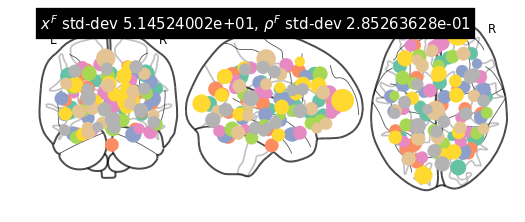

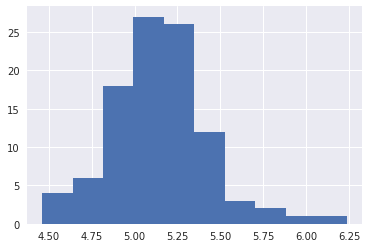

(<nilearn.plotting.displays.OrthoProjector at 0x7f61a37cb630>,
 tensor([[-41.8081, -50.7417,  35.4201],
         [  1.8228,   6.4732,   5.9443],
         [-18.7481, -19.1730,   1.0498],
         [ 14.8559, -50.0162,  -0.5257],
         [ 39.2455, -50.9406,  37.9706],
         [-38.3374,   8.7681,   2.9124],
         [ 35.0961,  36.9788,  -5.1082],
         [-40.1311,  23.7561,  -3.0044],
         [ 21.2236, -83.0152,   6.5498],
         [ 51.2644,  -8.8120,  21.9489],
         [-13.0837, -28.0761,  30.2429],
         [ 10.9810,  32.3904,   9.8785],
         [  2.5420,  27.6451,  38.1748],
         [  3.7062, -17.2762, -37.1334],
         [ 19.9649,  -0.0193,  45.5753],
         [-32.4907, -63.2855, -27.1664],
         [ 45.4910, -26.5929,   6.9224],
         [-25.2752, -58.7295,  37.8346],
         [-24.4830,  45.7702,   8.8736],
         [ 32.0557, -68.1510,  17.1414],
         [-44.9135, -43.9736,   9.8548],
         [-22.2088, -76.0702,  22.1811],
         [ 28.3225, -20.9489, -20.5

In [16]:
htfa.visualize_factor_template()